<a href="https://colab.research.google.com/github/srijan210704/Stock-Market-Predictor/blob/main/Stock_market_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
%matplotlib inline

In [31]:
df = pd.read_csv('HINDUNILVR.csv')

In [32]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HINDLEVER,EQ,2136.60,2300.0,2307.55,2300.00,2307.55,2307.55,2307.08,24903,5.745330e+12,NaN,NaN,NaN
1,2000-01-04,HINDLEVER,EQ,2307.55,2381.0,2381.00,2250.00,2270.00,2281.05,2298.15,58514,1.344740e+13,NaN,NaN,NaN
2,2000-01-05,HINDLEVER,EQ,2281.05,2200.0,2250.00,2105.00,2183.50,2199.90,2211.17,80296,1.775482e+13,NaN,NaN,NaN
3,2000-01-06,HINDLEVER,EQ,2199.90,2224.9,2360.00,2210.00,2300.00,2288.20,2301.80,190032,4.374157e+13,NaN,NaN,NaN
4,2000-01-07,HINDLEVER,EQ,2288.20,2300.0,2452.00,2282.25,2395.00,2412.95,2380.24,192582,4.583919e+13,NaN,NaN,NaN


In [33]:
df.shape

(5306, 15)

In [34]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4791 non-null   float64
 14  %Deliverble         4791 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [35]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     515
%Deliverble            515
dtype: int64

Text(0, 0.5, 'Count')

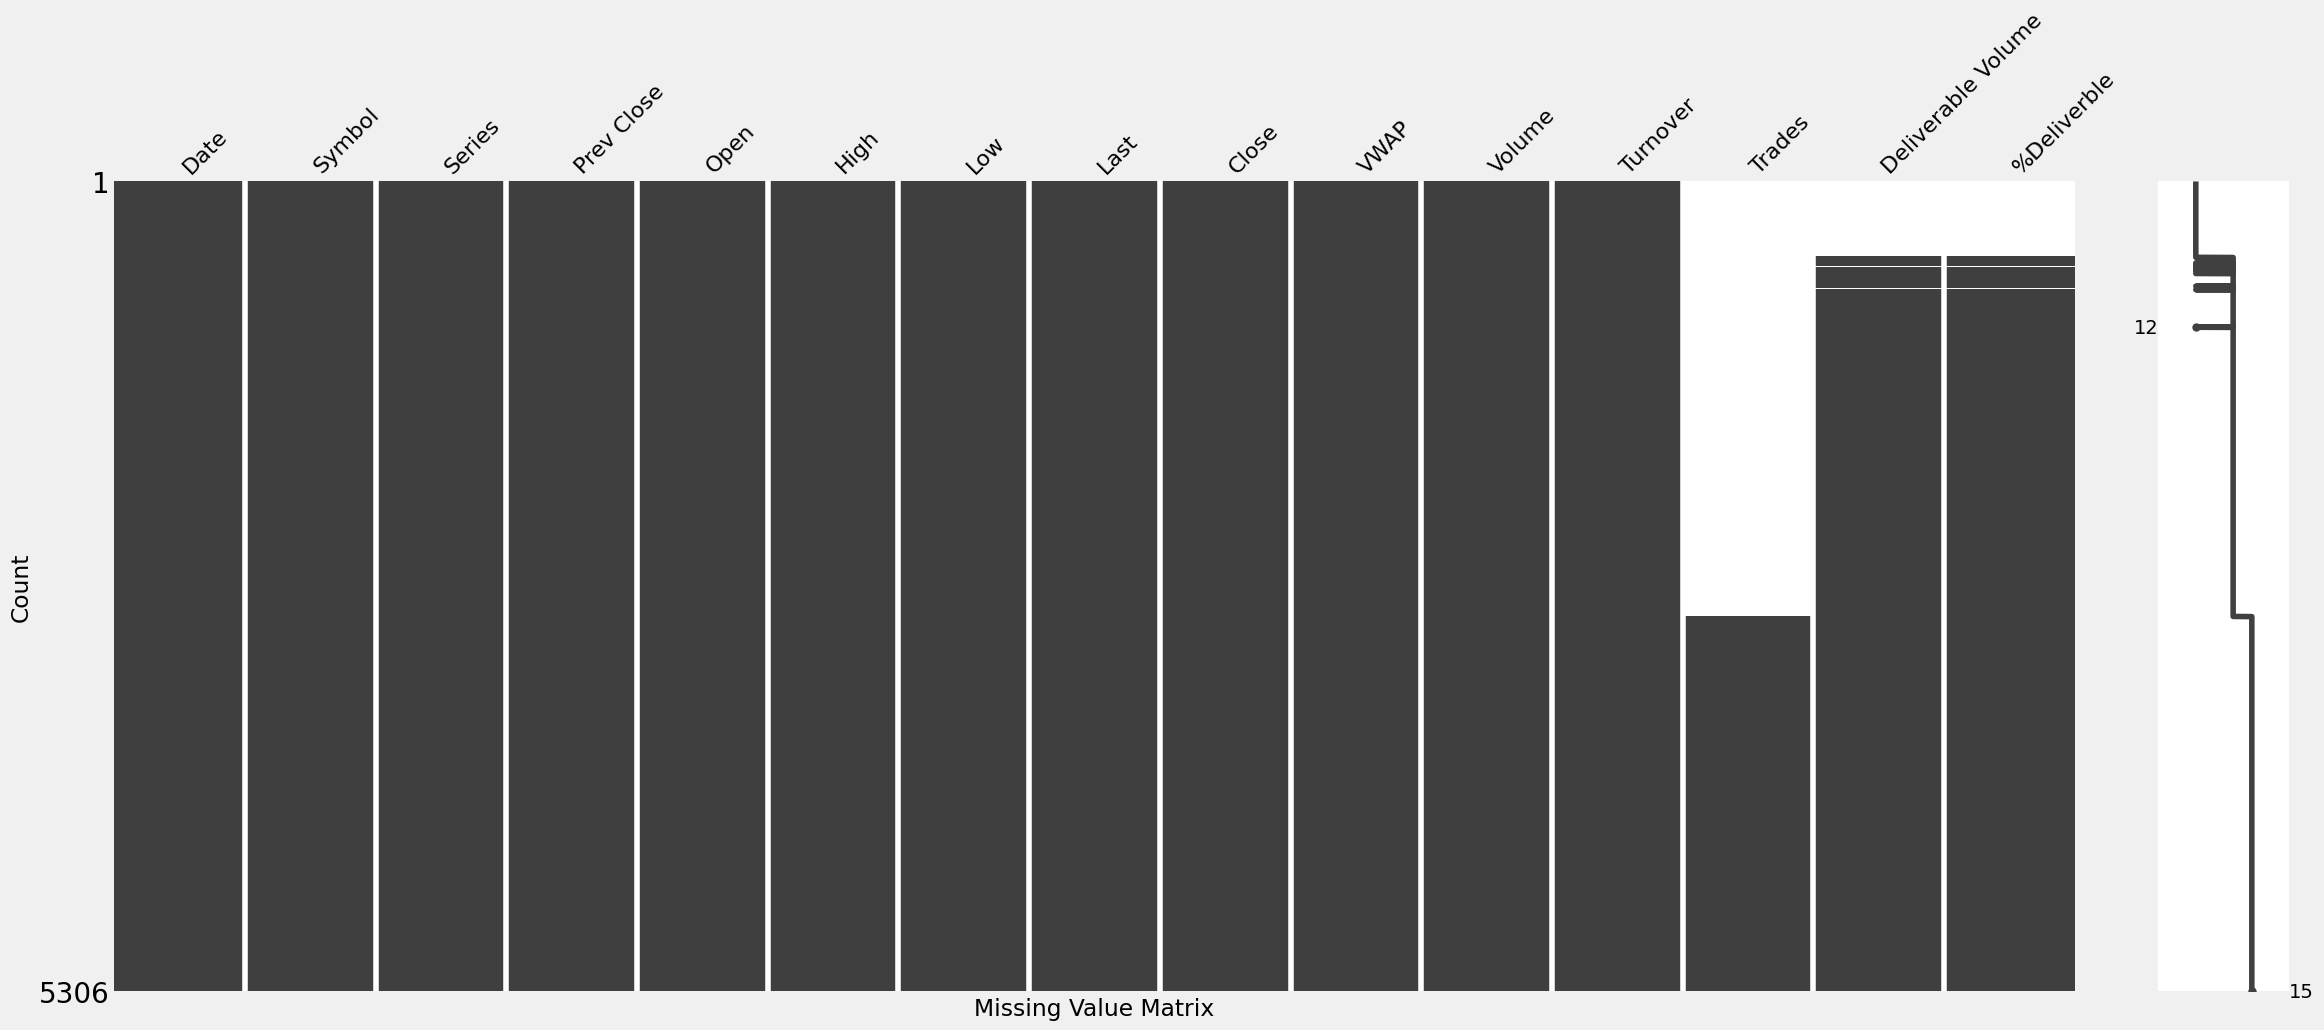

In [36]:
import missingno as msno
msno.matrix(df)
plt.xlabel("Missing Value Matrix")
plt.ylabel("Count")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4791 non-null   float64
 14  %Deliverble         4791 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [38]:
stock_price_oneyear = df[(df['Date']>'2011-03-31')&(df['Date']<'2012-04-01')]
stock_price_oneyear

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2810,2011-04-01,HINDUNILVR,EQ,287.10,286.00,290.05,282.00,283.70,283.95,285.51,1301124,3.714816e+13,NaN,834937.0,0.6417
2811,2011-04-04,HINDUNILVR,EQ,283.95,283.10,284.90,277.15,279.15,279.65,279.30,970446,2.710416e+13,NaN,498086.0,0.5133
2812,2011-04-05,HINDUNILVR,EQ,279.65,279.00,282.75,274.00,275.55,275.35,277.69,1201569,3.336678e+13,NaN,693534.0,0.5772
2813,2011-04-06,HINDUNILVR,EQ,275.35,276.00,278.20,274.10,277.00,277.20,276.22,1355991,3.745525e+13,NaN,821116.0,0.6055
2814,2011-04-07,HINDUNILVR,EQ,277.20,277.60,279.25,275.00,276.70,276.00,276.93,1185709,3.283621e+13,NaN,756480.0,0.6380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,2012-03-26,HINDUNILVR,EQ,403.10,403.00,405.45,396.55,402.05,403.35,402.43,1925706,7.749614e+13,26174.0,1251626.0,0.6500
3055,2012-03-27,HINDUNILVR,EQ,403.35,404.80,417.70,403.00,416.50,416.05,414.18,4279621,1.772512e+14,45298.0,2878874.0,0.6727
3056,2012-03-28,HINDUNILVR,EQ,416.05,415.55,418.55,411.00,412.85,412.50,415.12,1830505,7.598867e+13,34924.0,1228243.0,0.6710
3057,2012-03-29,HINDUNILVR,EQ,412.50,411.00,414.55,406.20,409.80,408.35,409.40,2403473,9.839861e+13,57498.0,1472232.0,0.6125


In [39]:
stock_price_oneyear.isnull().sum()

Date                   0
Symbol                 0
Series                 0
Prev Close             0
Open                   0
High                   0
Low                    0
Last                   0
Close                  0
VWAP                   0
Volume                 0
Turnover               0
Trades                40
Deliverable Volume     0
%Deliverble            0
dtype: int64

In [40]:
stock_price_oneyear.describe()


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02,2.490000e+02,209.000000,2.490000e+02,249.000000
mean,348.082932,348.267871,352.698795,344.391767,348.717871,348.576707,348.634498,2.473939e+06,8.717349e+13,31808.765550,1.574453e+06,0.631573
std,40.809036,41.023908,41.146263,40.500460,40.820001,40.812014,40.863663,1.496865e+06,5.573227e+13,16015.735546,9.481096e+05,0.100096
min,267.550000,269.900000,275.250000,265.900000,267.900000,267.550000,269.200000,4.771100e+04,1.823632e+12,789.000000,1.697700e+04,0.247000
25%,318.850000,318.000000,321.150000,314.500000,319.400000,319.200000,318.310000,1.500384e+06,5.025147e+13,19817.000000,9.002700e+05,0.573500
50%,334.750000,334.000000,339.900000,331.650000,335.400000,335.750000,335.620000,2.103172e+06,7.449584e+13,28905.000000,1.371964e+06,0.639100
75%,388.500000,388.850000,393.000000,384.100000,389.150000,388.550000,389.180000,2.979527e+06,1.076948e+14,40153.000000,1.980878e+06,0.700700
max,419.200000,419.000000,420.250000,415.050000,419.000000,419.200000,417.740000,9.174039e+06,3.517152e+14,101499.000000,5.489205e+06,0.835000


<Axes: >

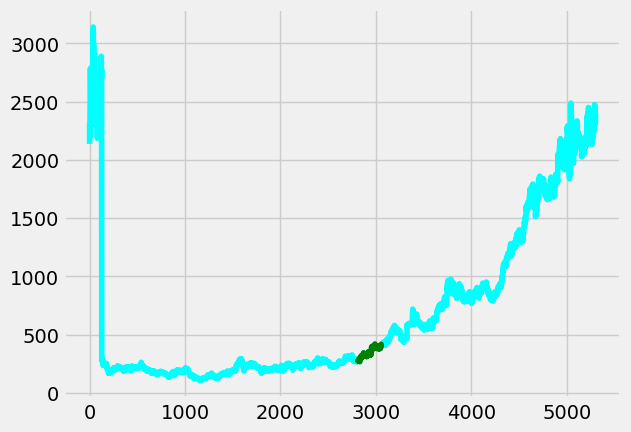

In [41]:
#Data Visualization
pl = df['Prev Close'].plot(c='cyan')
stock_price_oneyear['Prev Close'].plot(ax=pl,c='green')

<Axes: >

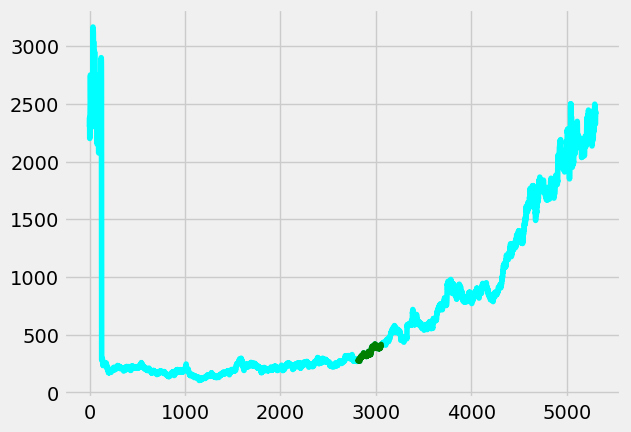

In [42]:
pl = df['Open'].plot(c='cyan')
stock_price_oneyear['Open'].plot(ax=pl,c='green')

<Axes: >

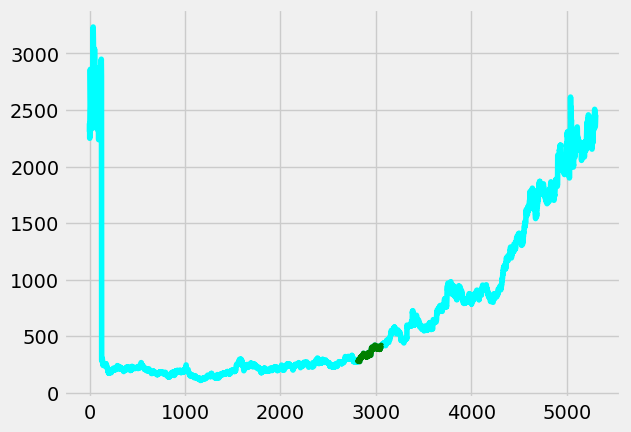

In [43]:
pl = df['High'].plot(c='cyan')
stock_price_oneyear['High'].plot(ax=pl,c='green')

<Axes: >

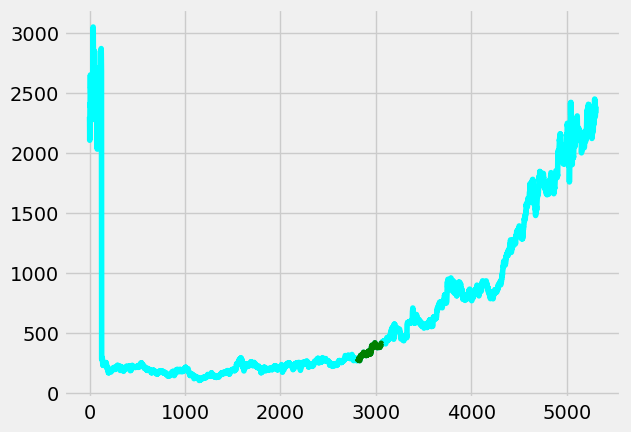

In [44]:
pl = df['Low'].plot(c='cyan')
stock_price_oneyear['Low'].plot(ax=pl,c='green')

<Axes: >

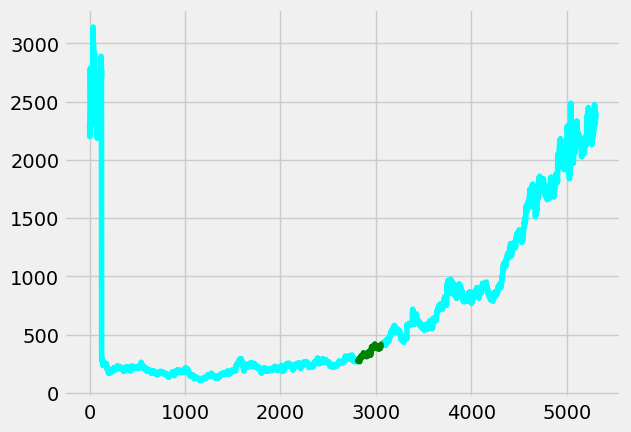

In [45]:
pl = df['Close'].plot(c='cyan')
stock_price_oneyear['Close'].plot(ax=pl,c='green')

<Axes: >

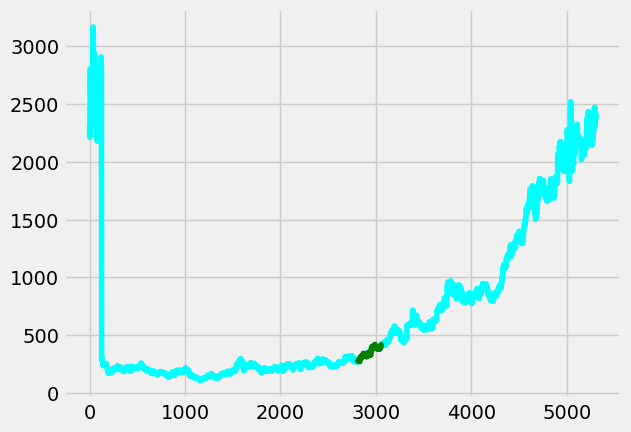

In [46]:
pl = df['VWAP'].plot(c='cyan')
stock_price_oneyear['VWAP'].plot(ax=pl,c='green')

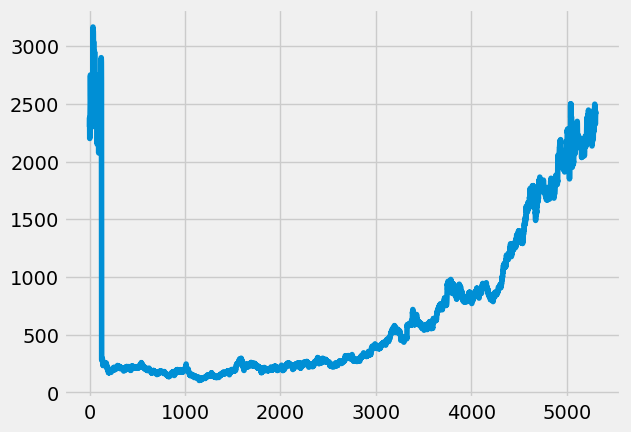

In [47]:
plt.plot(df['Open'])

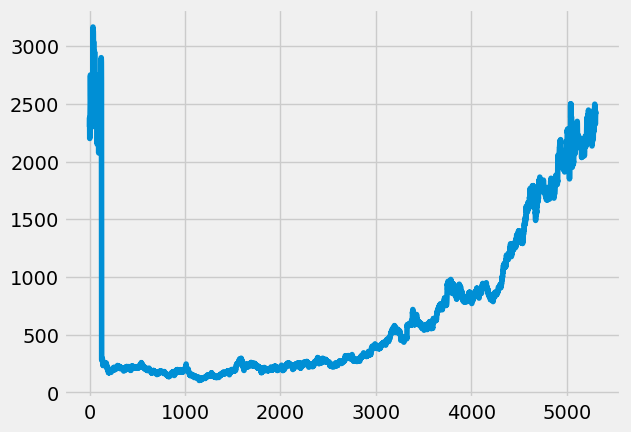

In [48]:
plt.style.use('fivethirtyeight')
plt.plot(df['Open'])

<Axes: >

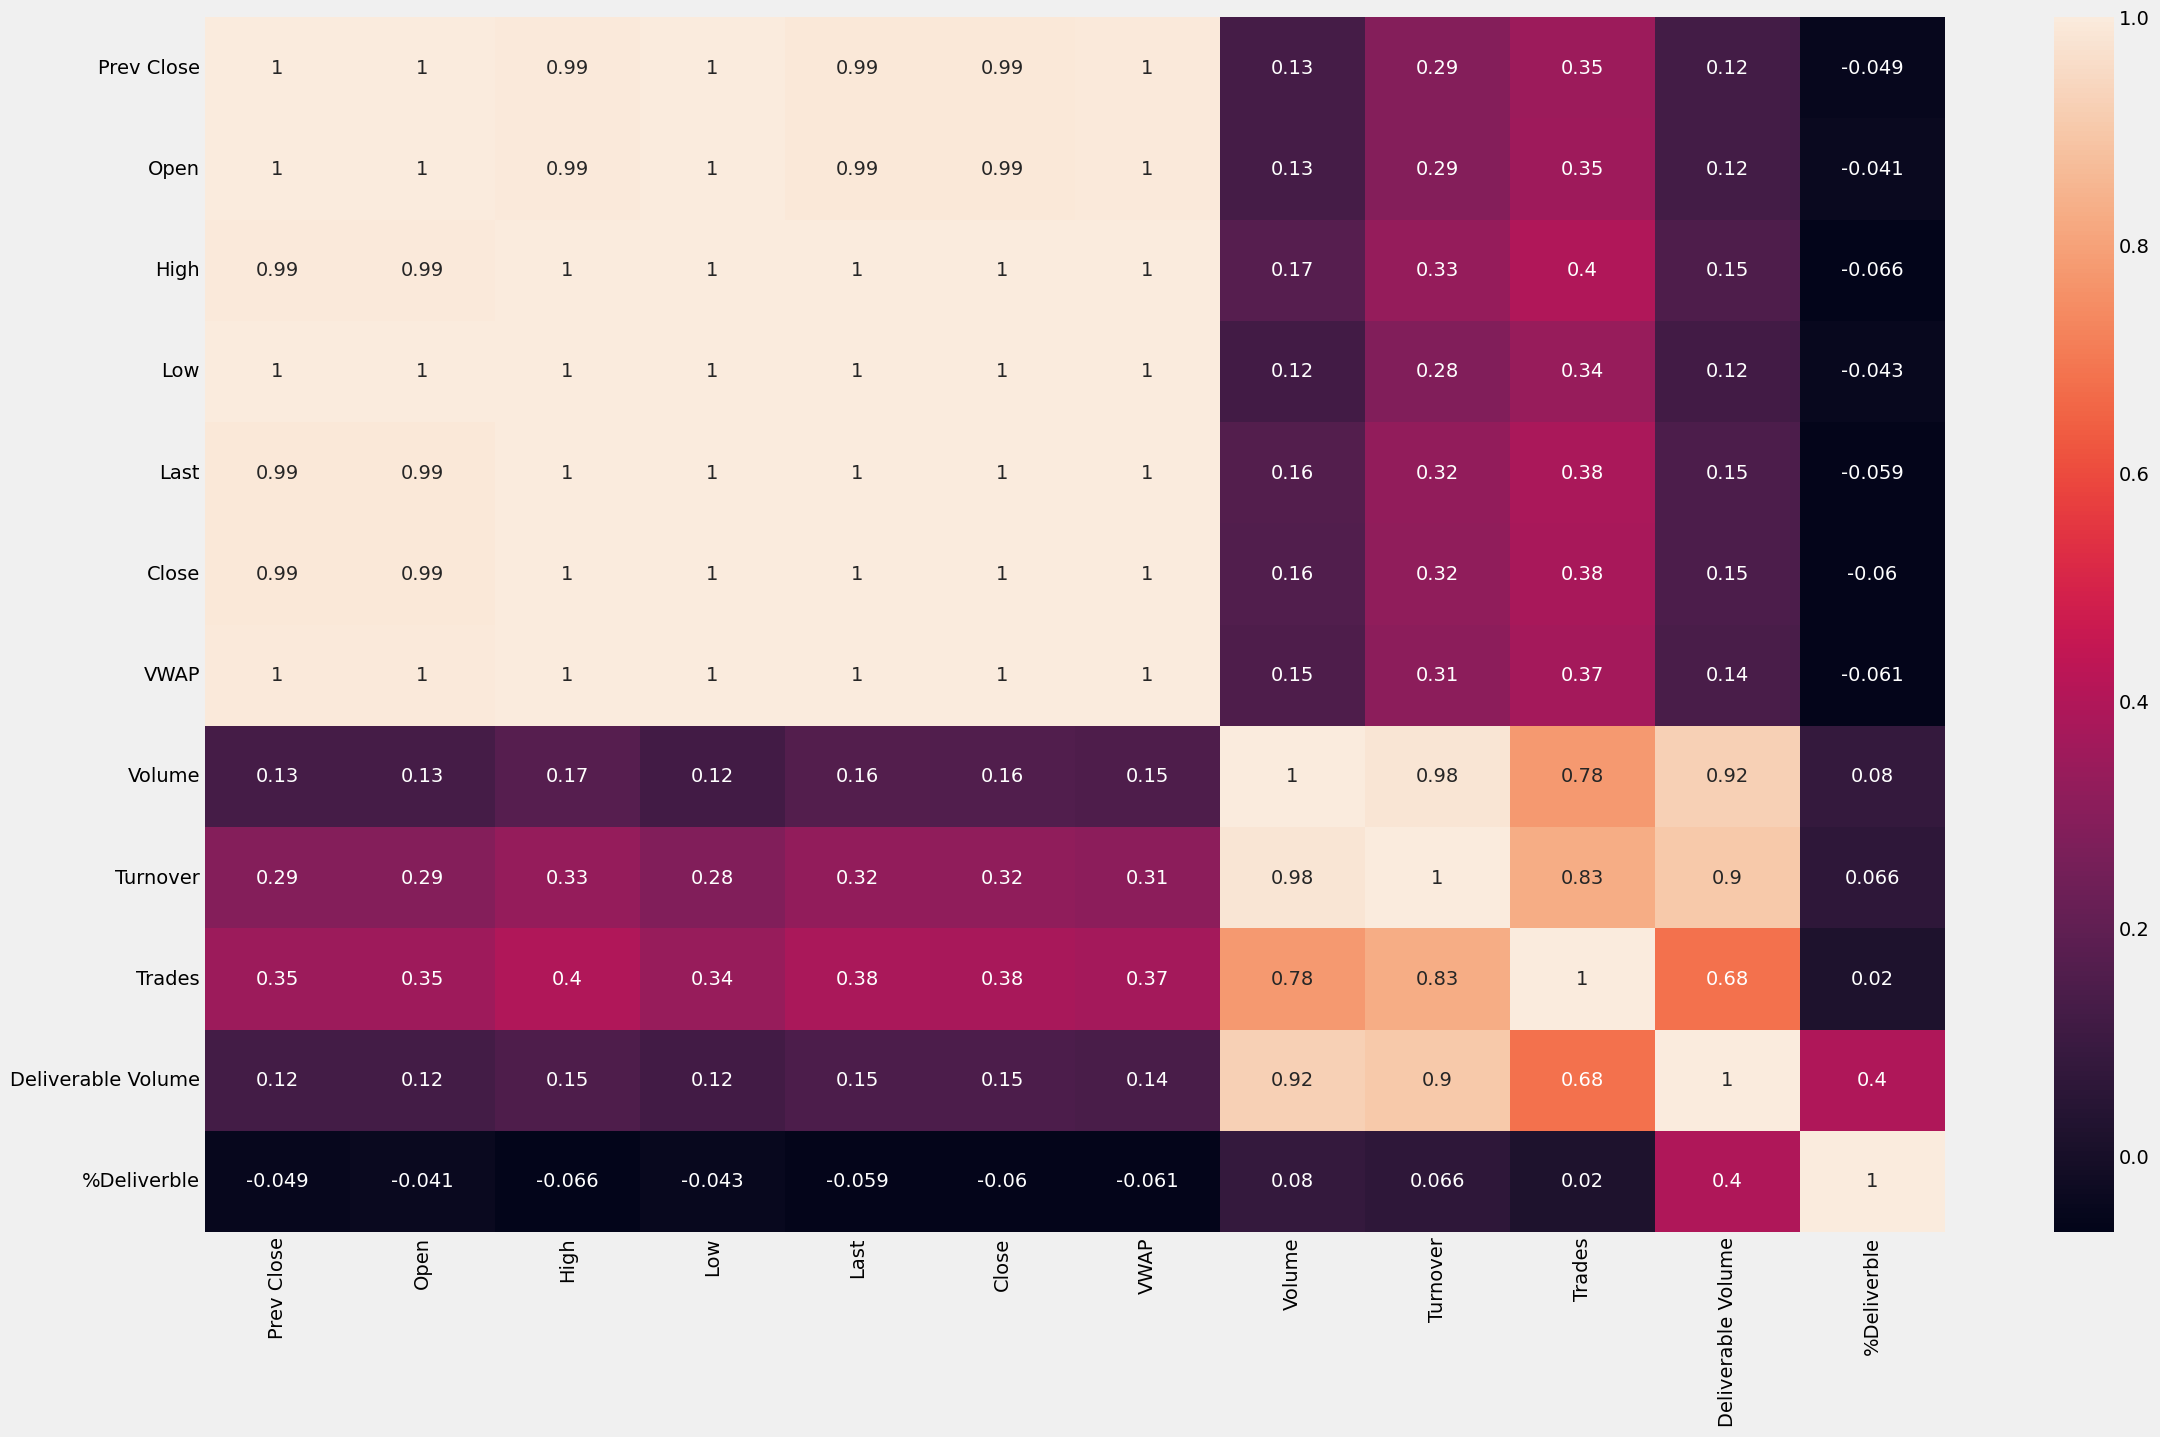

In [49]:
df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(stock_price_oneyear.corr(method = 'pearson'),annot=True)

<Axes: xlabel='Date'>

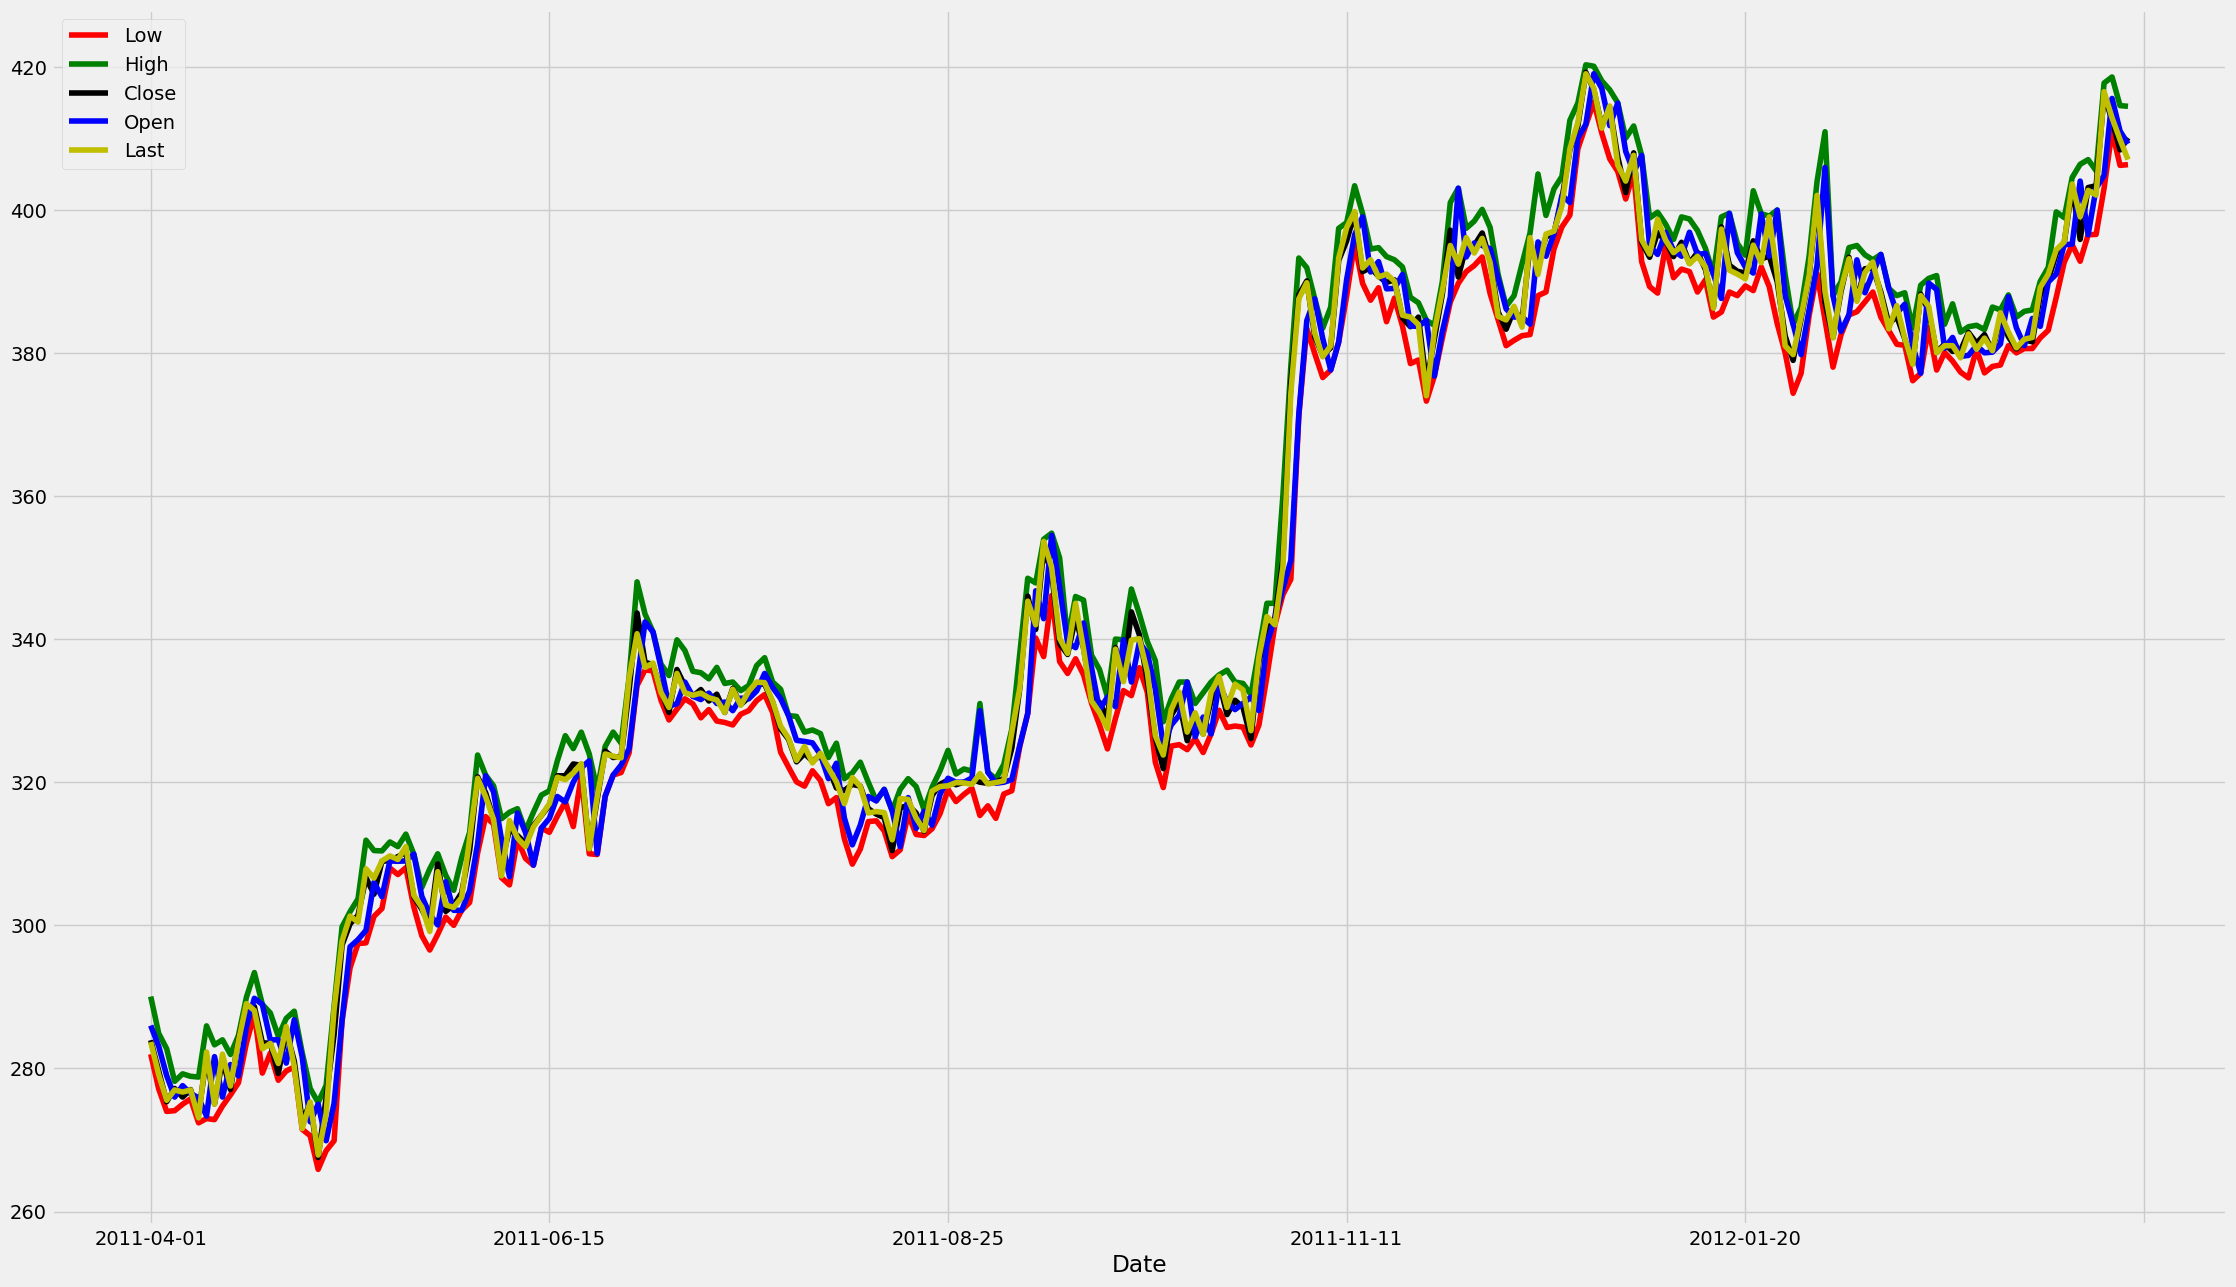

In [50]:
stock_price_oneyear.plot(x="Date",y=["Low","High","Close","Open","Last"],color = ['r','g','k','b','y'],figsize =[25,15])

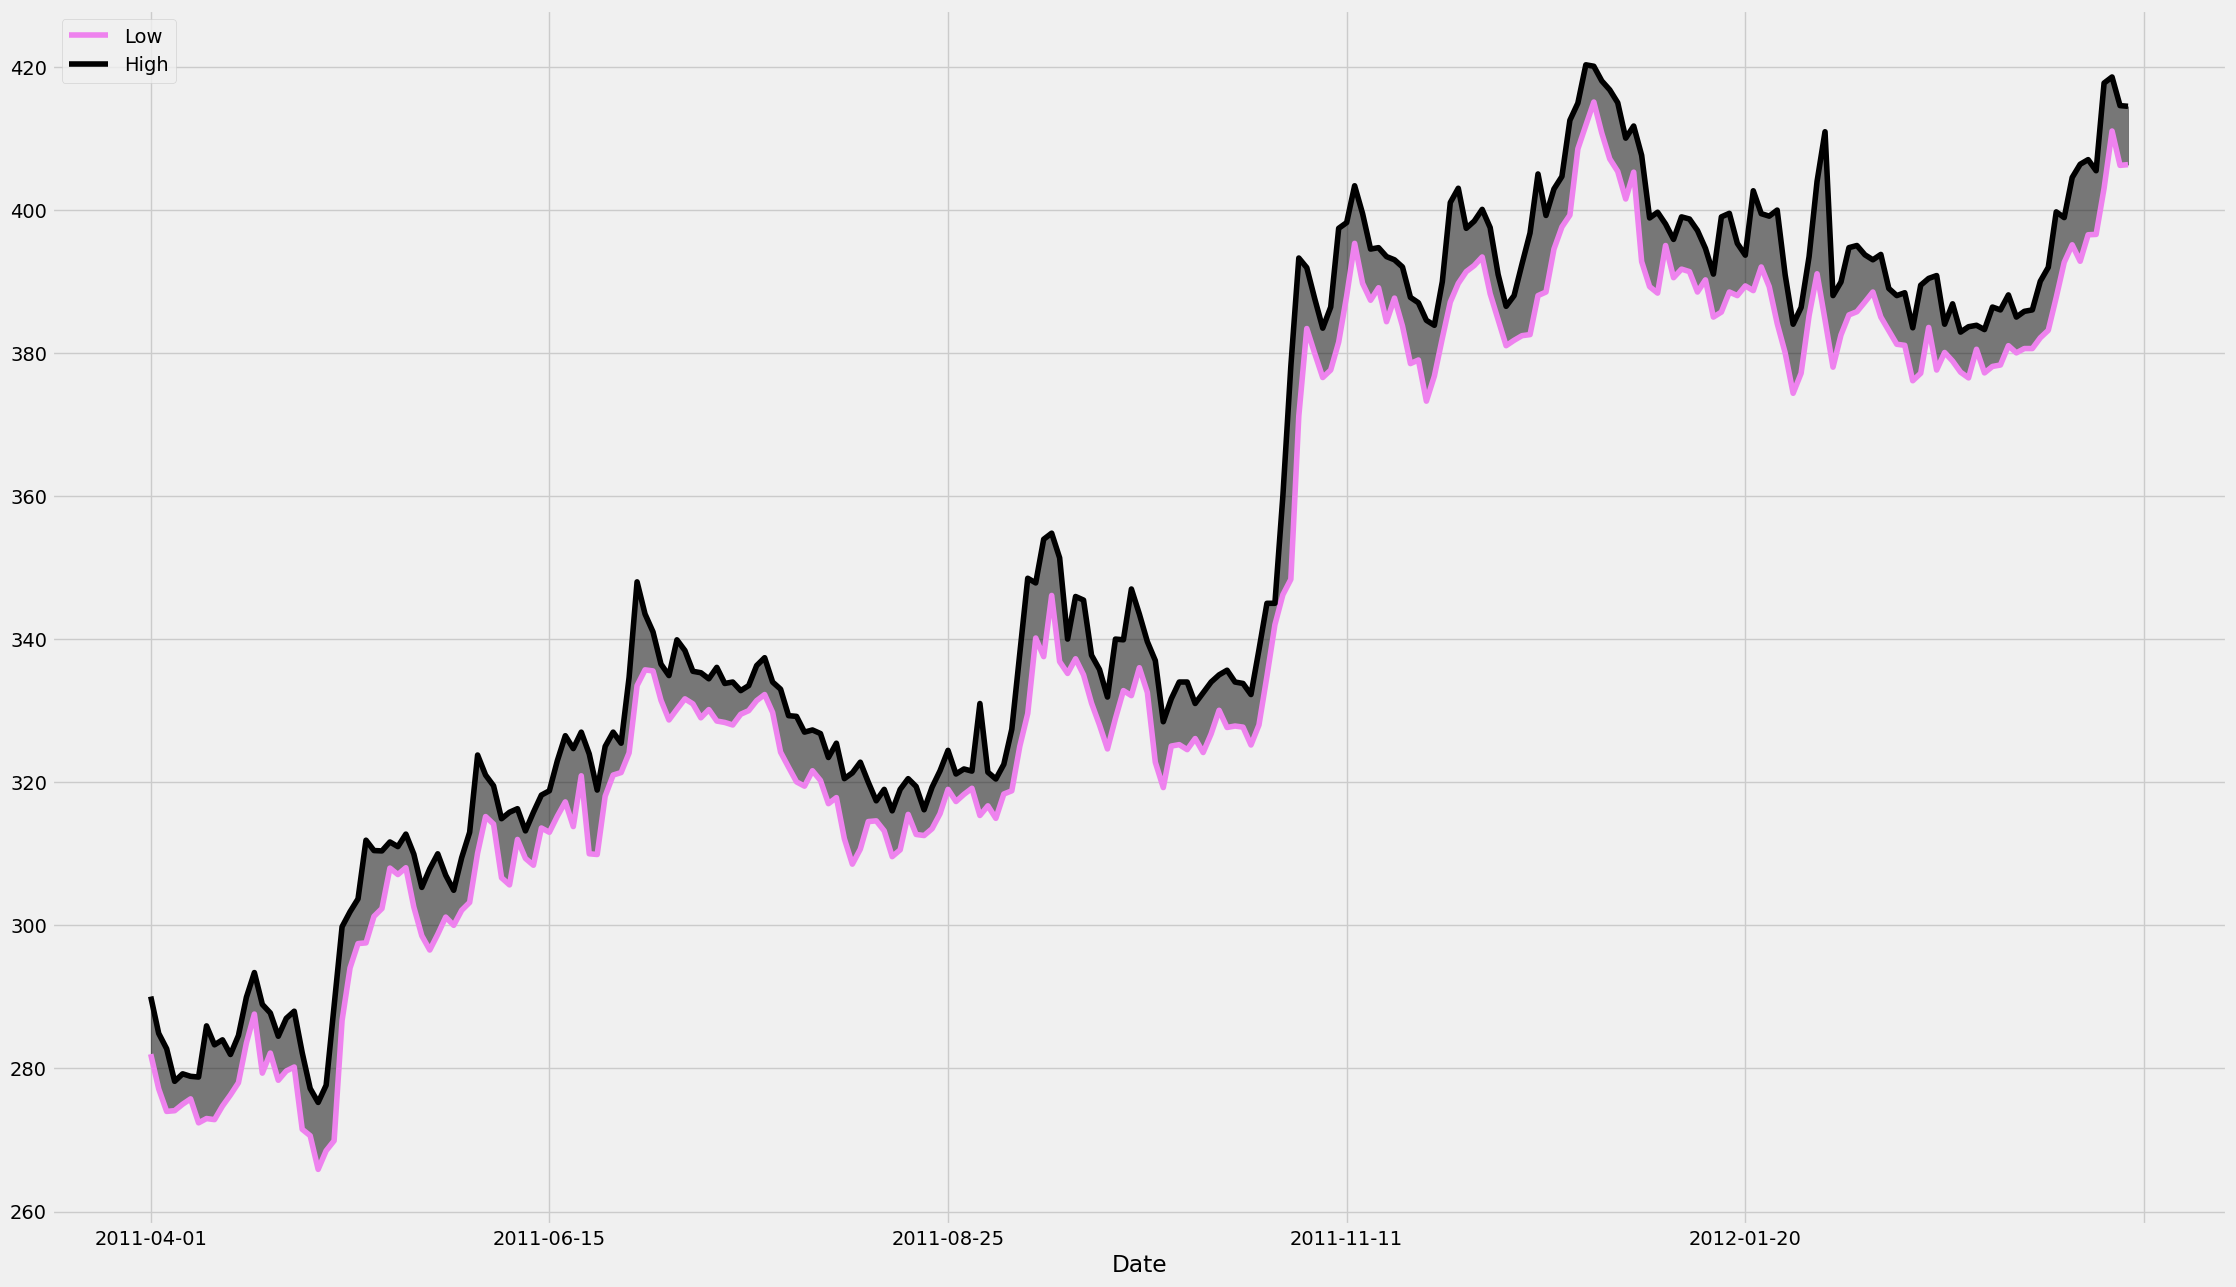

In [51]:
stock_price_oneyear.plot(x="Date",y=["Low","High"],color=['violet','black'],figsize = [25,15])
plt.fill_between(stock_price_oneyear['Date'],stock_price_oneyear['Low'],stock_price_oneyear['High'],color = 'k',alpha = 0.5)
plt.show()

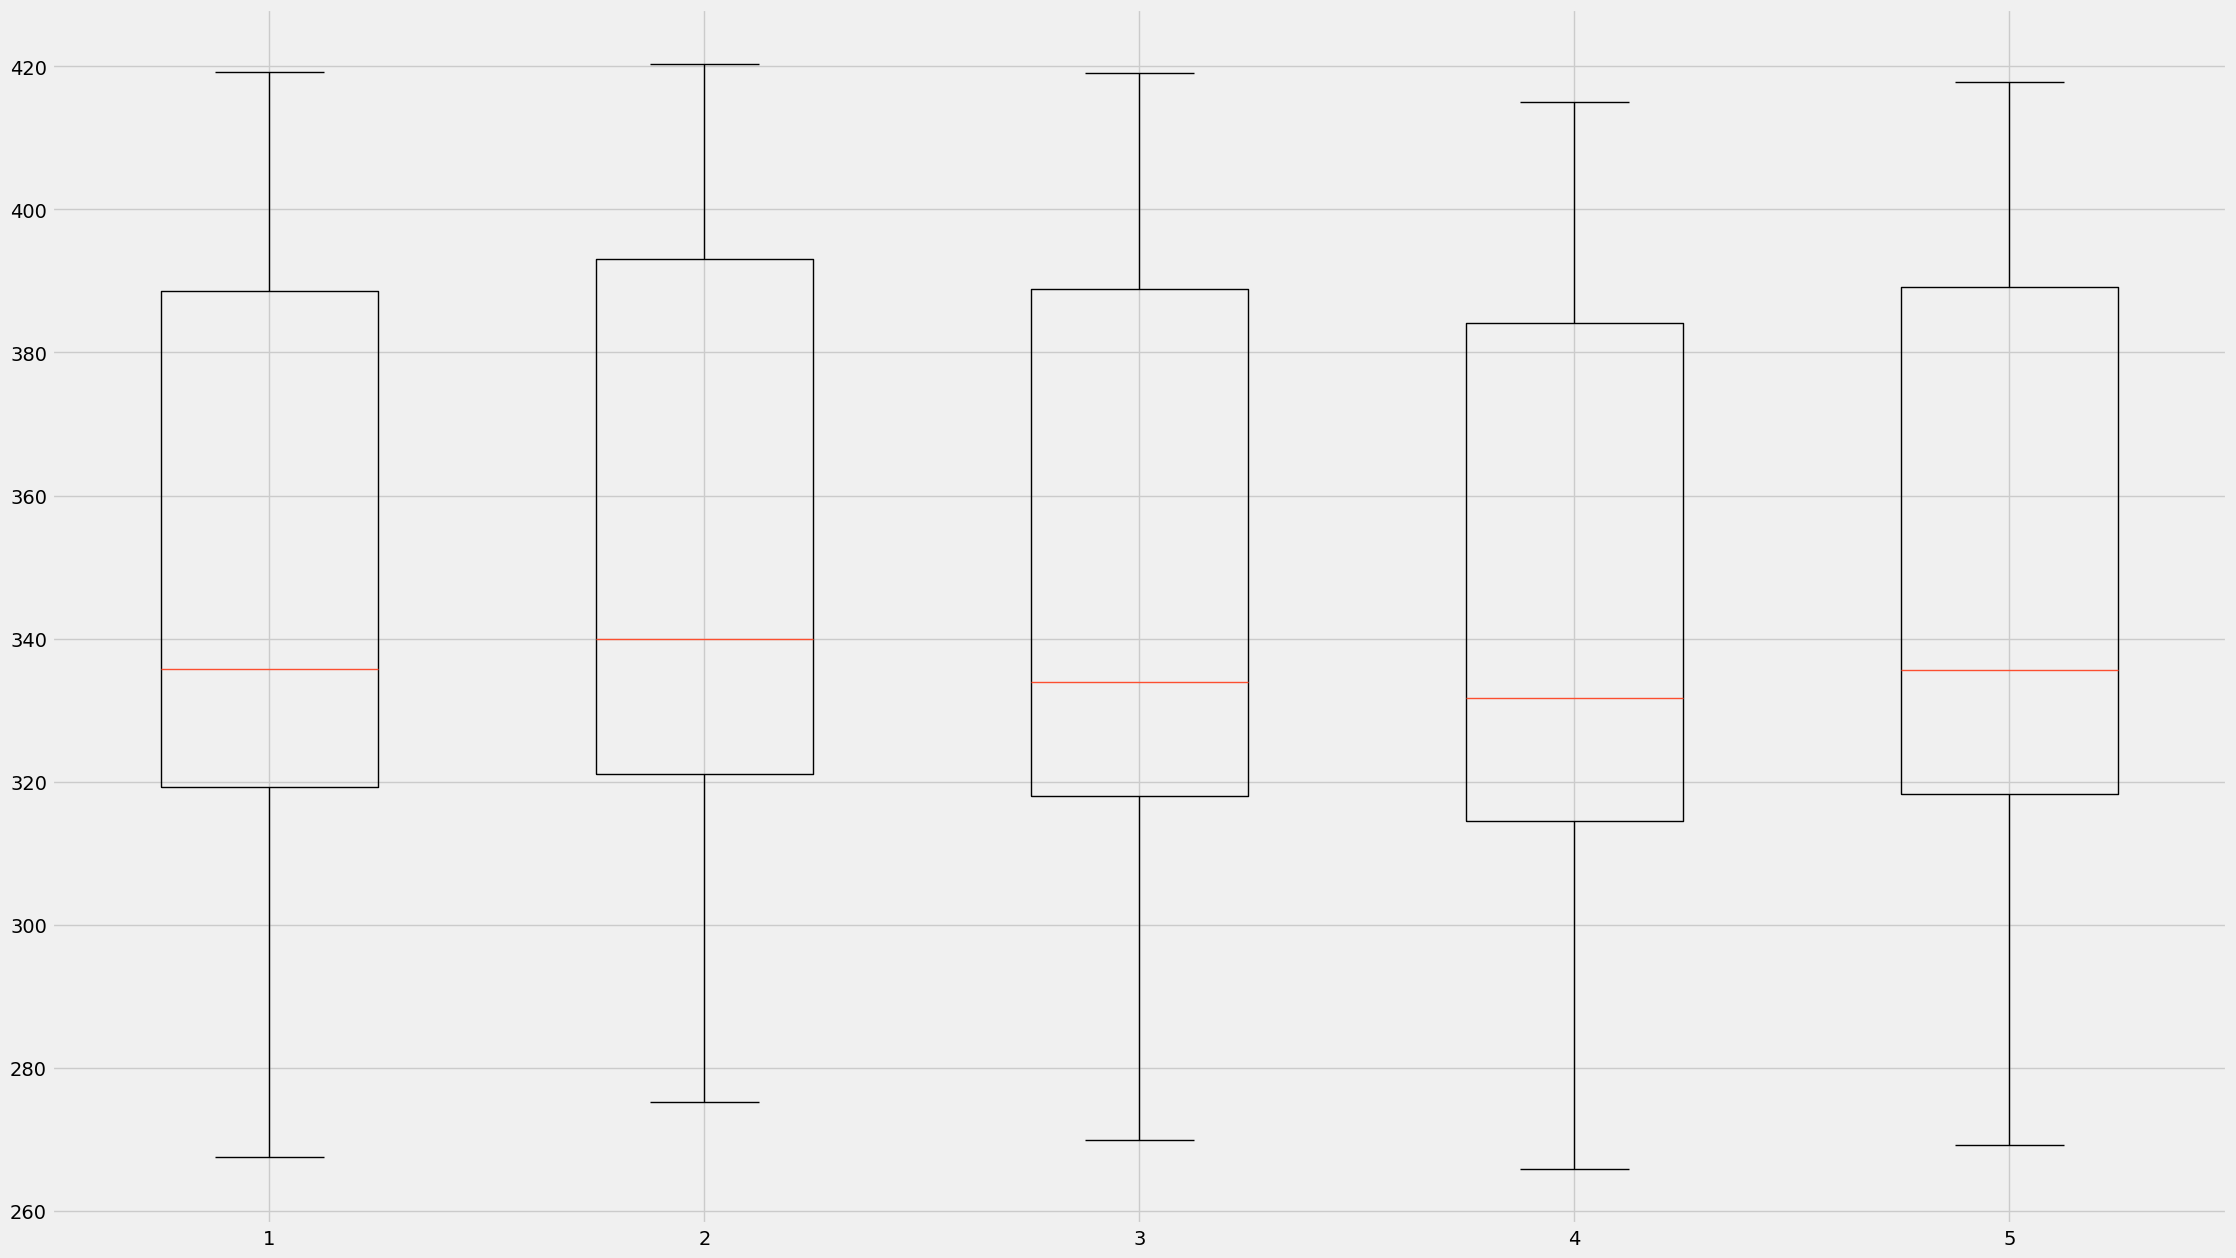

In [52]:
plt.figure(figsize=(25,15))
plt.boxplot(stock_price_oneyear[['Close','High','Open','Low','VWAP']])
plt.show()

In [53]:
data=df[['Date','Open','High','Low','Volume','VWAP']]

In [54]:
df.set_index('Date',drop =False, inplace=True)

<Axes: xlabel='Date'>

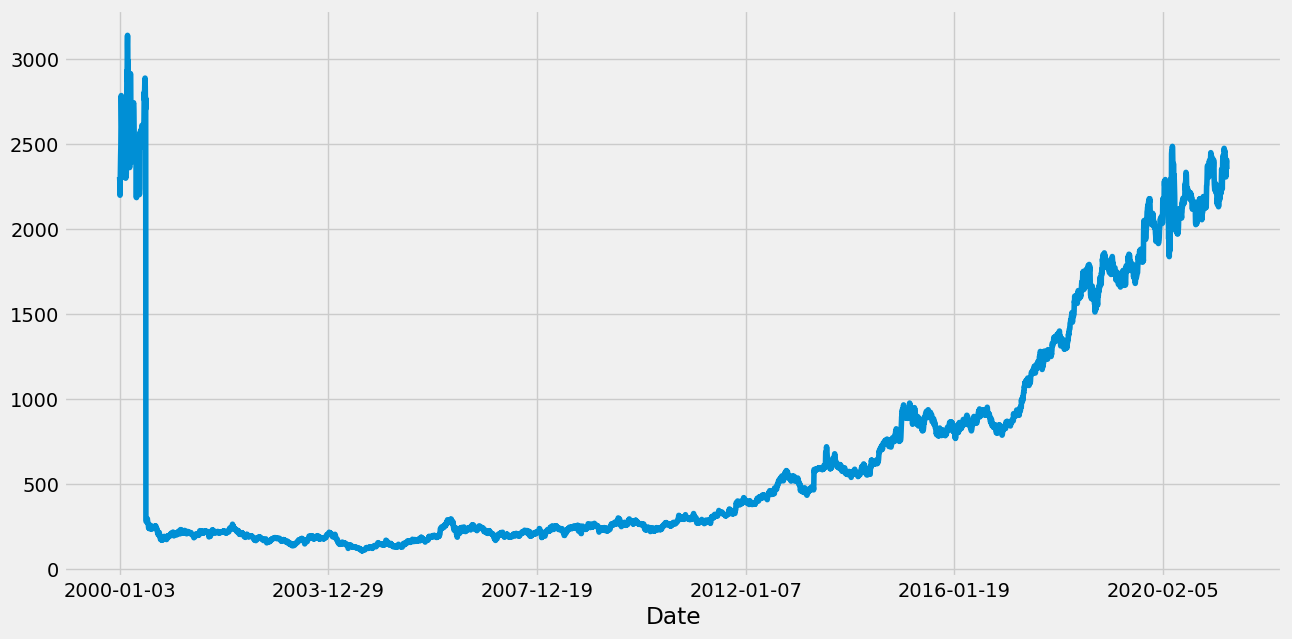

In [55]:
df.Close.plot(figsize=(14,7))

In [58]:

# Reset index without creating a new column
df.reset_index(drop=True, inplace=True)

# Define lag features and rolling window sizes
lag_features = ['Open', 'High', 'Low', 'VWAP']
window1 = 3
window2 = 7

# Rolling mean calculation
df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

# Rolling standard deviation calculation
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

# Assign lagged features to the DataFrame
for feature in lag_features:
    # Assign rolling mean lag features
    df[f'{feature}_mean_lag{window1}'] = df_mean_3d[feature].astype(np.float32)
    # Assign rolling std lag features
    df[f'{feature}_std_lag{window2}'] = df_std_7d[feature].astype(np.float32)


In [59]:
df.fillna(df.mean(),inplace=True)

In [60]:
df.set_index("Date",drop=False,inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,HINDLEVER,EQ,2136.60,2300.0,2307.55,2300.00,2307.55,2307.55,2307.08,...,1.331771e+06,0.603171,681.950012,13.717367,690.589844,12.933799,672.580566,12.747044,681.524719,12.563543
2000-01-04,2000-01-04,HINDLEVER,EQ,2307.55,2381.0,2381.00,2250.00,2270.00,2281.05,2298.15,...,1.331771e+06,0.603171,2300.000000,13.717367,2307.550049,12.933799,2300.000000,12.747044,2307.080078,12.563543
2000-01-05,2000-01-05,HINDLEVER,EQ,2281.05,2200.0,2250.00,2105.00,2183.50,2199.90,2211.17,...,1.331771e+06,0.603171,2340.500000,57.275650,2344.274902,51.936993,2275.000000,35.355339,2302.614990,6.314464
2000-01-06,2000-01-06,HINDLEVER,EQ,2199.90,2224.9,2360.00,2210.00,2300.00,2288.20,2301.80,...,1.331771e+06,0.603171,2293.666748,90.666054,2312.850098,65.660622,2218.333252,101.283432,2272.133301,52.984264
2000-01-07,2000-01-07,HINDLEVER,EQ,2288.20,2300.0,2452.00,2282.25,2395.00,2412.95,2380.24,...,1.331771e+06,0.603171,2268.633301,81.623749,2330.333252,58.566135,2188.333252,82.802475,2270.373291,45.733822


In [62]:
df.Date=pd.to_datetime(df.Date,format = '%Y-%m-%d')
df["month"]=df.Date.dt.month
df["day"]=df.Date.dt.day
df["Day_of_week"]=df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,Day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,HINDLEVER,EQ,2136.60,2300.0,2307.55,2300.00,2307.55,2307.55,2307.08,...,13.717367,690.589844,12.933799,672.580566,12.747044,681.524719,12.563543,1,3,0
2000-01-04,2000-01-04,HINDLEVER,EQ,2307.55,2381.0,2381.00,2250.00,2270.00,2281.05,2298.15,...,13.717367,2307.550049,12.933799,2300.000000,12.747044,2307.080078,12.563543,1,4,1
2000-01-05,2000-01-05,HINDLEVER,EQ,2281.05,2200.0,2250.00,2105.00,2183.50,2199.90,2211.17,...,57.275650,2344.274902,51.936993,2275.000000,35.355339,2302.614990,6.314464,1,5,2
2000-01-06,2000-01-06,HINDLEVER,EQ,2199.90,2224.9,2360.00,2210.00,2300.00,2288.20,2301.80,...,90.666054,2312.850098,65.660622,2218.333252,101.283432,2272.133301,52.984264,1,6,3
2000-01-07,2000-01-07,HINDLEVER,EQ,2288.20,2300.0,2452.00,2282.25,2395.00,2412.95,2380.24,...,81.623749,2330.333252,58.566135,2188.333252,82.802475,2270.373291,45.733822,1,7,4


In [63]:
df=df.drop(columns=['Symbol'])
df=df.drop(columns=['Series'])

In [64]:
df_train=df[df.Date <'2018']
df_valid=df[df.Date >='2018']

In [67]:
df_valid.shape

(823, 24)

In [69]:
!pip install keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler

In [70]:
df_train.head().T

Date,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07
Date,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00
Prev Close,2136.6,2307.55,2281.05,2199.9,2288.2
Open,2300.0,2381.0,2200.0,2224.9,2300.0
High,2307.55,2381.0,2250.0,2360.0,2452.0
Low,2300.0,2250.0,2105.0,2210.0,2282.25
Last,2307.55,2270.0,2183.5,2300.0,2395.0
Close,2307.55,2281.05,2199.9,2288.2,2412.95
VWAP,2307.08,2298.15,2211.17,2301.8,2380.24
Volume,24903,58514,80296,190032,192582
Turnover,5745329890000.0,13447400525000.0,17754819445000.0,43741570135000.0,45839194485000.0


In [73]:
y_train=df_train["Close"]
scaler=MinMaxScaler(feature_range=(0,1))
y_train1=scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_trainn=df_train['Close'].to_numpy().reshape(-1,1)

In [82]:
y_valid=df_valid["Close"]
scaler1=MinMaxScaler(feature_range=(0,1))
y_valid1=scaler1.fit_transform(np.array(df_valid['Close']).reshape(-1,1))
y_validn=df_valid['Close'].to_numpy().reshape(-1,1)

In [78]:
X_train=df_train.drop(columns=["Close"])
X_train1=X_train.drop('Date',axis=1)
X_train1=(X_train1-X_train1.min())/X_train1.max()-X_train1.min()
X_train2=pd.concat((X_train1,X_train.Date),1)

In [79]:
X_valid=df_valid.drop(columns=["Close"])
X_valid1=X_valid.drop('Date',axis=1)
X_valid1=(X_valid1-X_valid1.min())/X_valid1.max()-X_valid1.min()
X_valid2=pd.concat((X_valid1,X_valid.Date),1)

In [80]:
X_train3=X_train2.drop(columns=['Date']).to_numpy()
X_valid3=X_valid2.drop(columns=['Date']).to_numpy()

In [83]:
y_train1=y_train1.reshape(-1,1)
y_valid1=y_valid1.reshape(-1,1)

In [84]:
!pip install xgboost

In [85]:
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance


MODEL TRAINING

In [87]:
xgb=XGBRegressor(n_estimators=1000,learning_rate=0.01)
xgb

xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],early_stopping_rounds=100,verbose=True)

[0]	validation_0-rmse:0.14815	validation_1-rmse:0.46557
[1]	validation_0-rmse:0.14669	validation_1-rmse:0.46644
[2]	validation_0-rmse:0.14524	validation_1-rmse:0.46731
[3]	validation_0-rmse:0.14381	validation_1-rmse:0.46816
[4]	validation_0-rmse:0.14239	validation_1-rmse:0.46901
[5]	validation_0-rmse:0.14099	validation_1-rmse:0.46985
[6]	validation_0-rmse:0.13960	validation_1-rmse:0.47068
[7]	validation_0-rmse:0.13822	validation_1-rmse:0.47150
[8]	validation_0-rmse:0.13686	validation_1-rmse:0.47232
[9]	validation_0-rmse:0.13551	validation_1-rmse:0.47313
[10]	validation_0-rmse:0.13418	validation_1-rmse:0.47393
[11]	validation_0-rmse:0.13286	validation_1-rmse:0.47472
[12]	validation_0-rmse:0.13155	validation_1-rmse:0.47551
[13]	validation_0-rmse:0.13026	validation_1-rmse:0.47630
[14]	validation_0-rmse:0.12897	validation_1-rmse:0.47707
[15]	validation_0-rmse:0.12770	validation_1-rmse:0.47784
[16]	validation_0-rmse:0.12645	validation_1-rmse:0.47859
[17]	validation_0-rmse:0.12520	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1200x800 with 0 Axes>

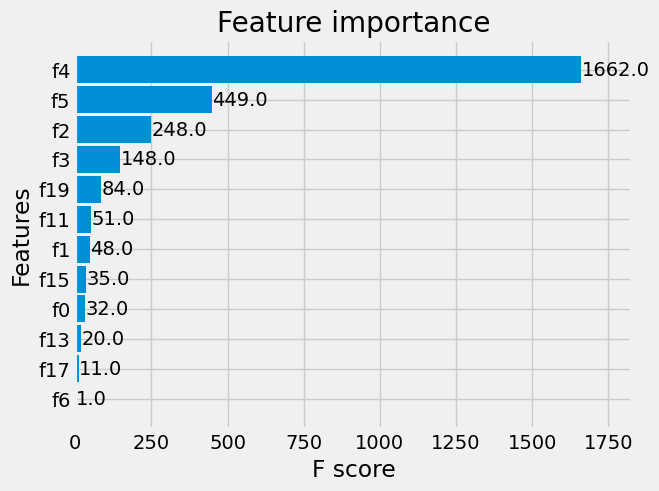

In [88]:
plt.figure(figsize=(12,8))
feature_importance=plot_importance(xgb,height=0.9)
feature_importance

In [92]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t = predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

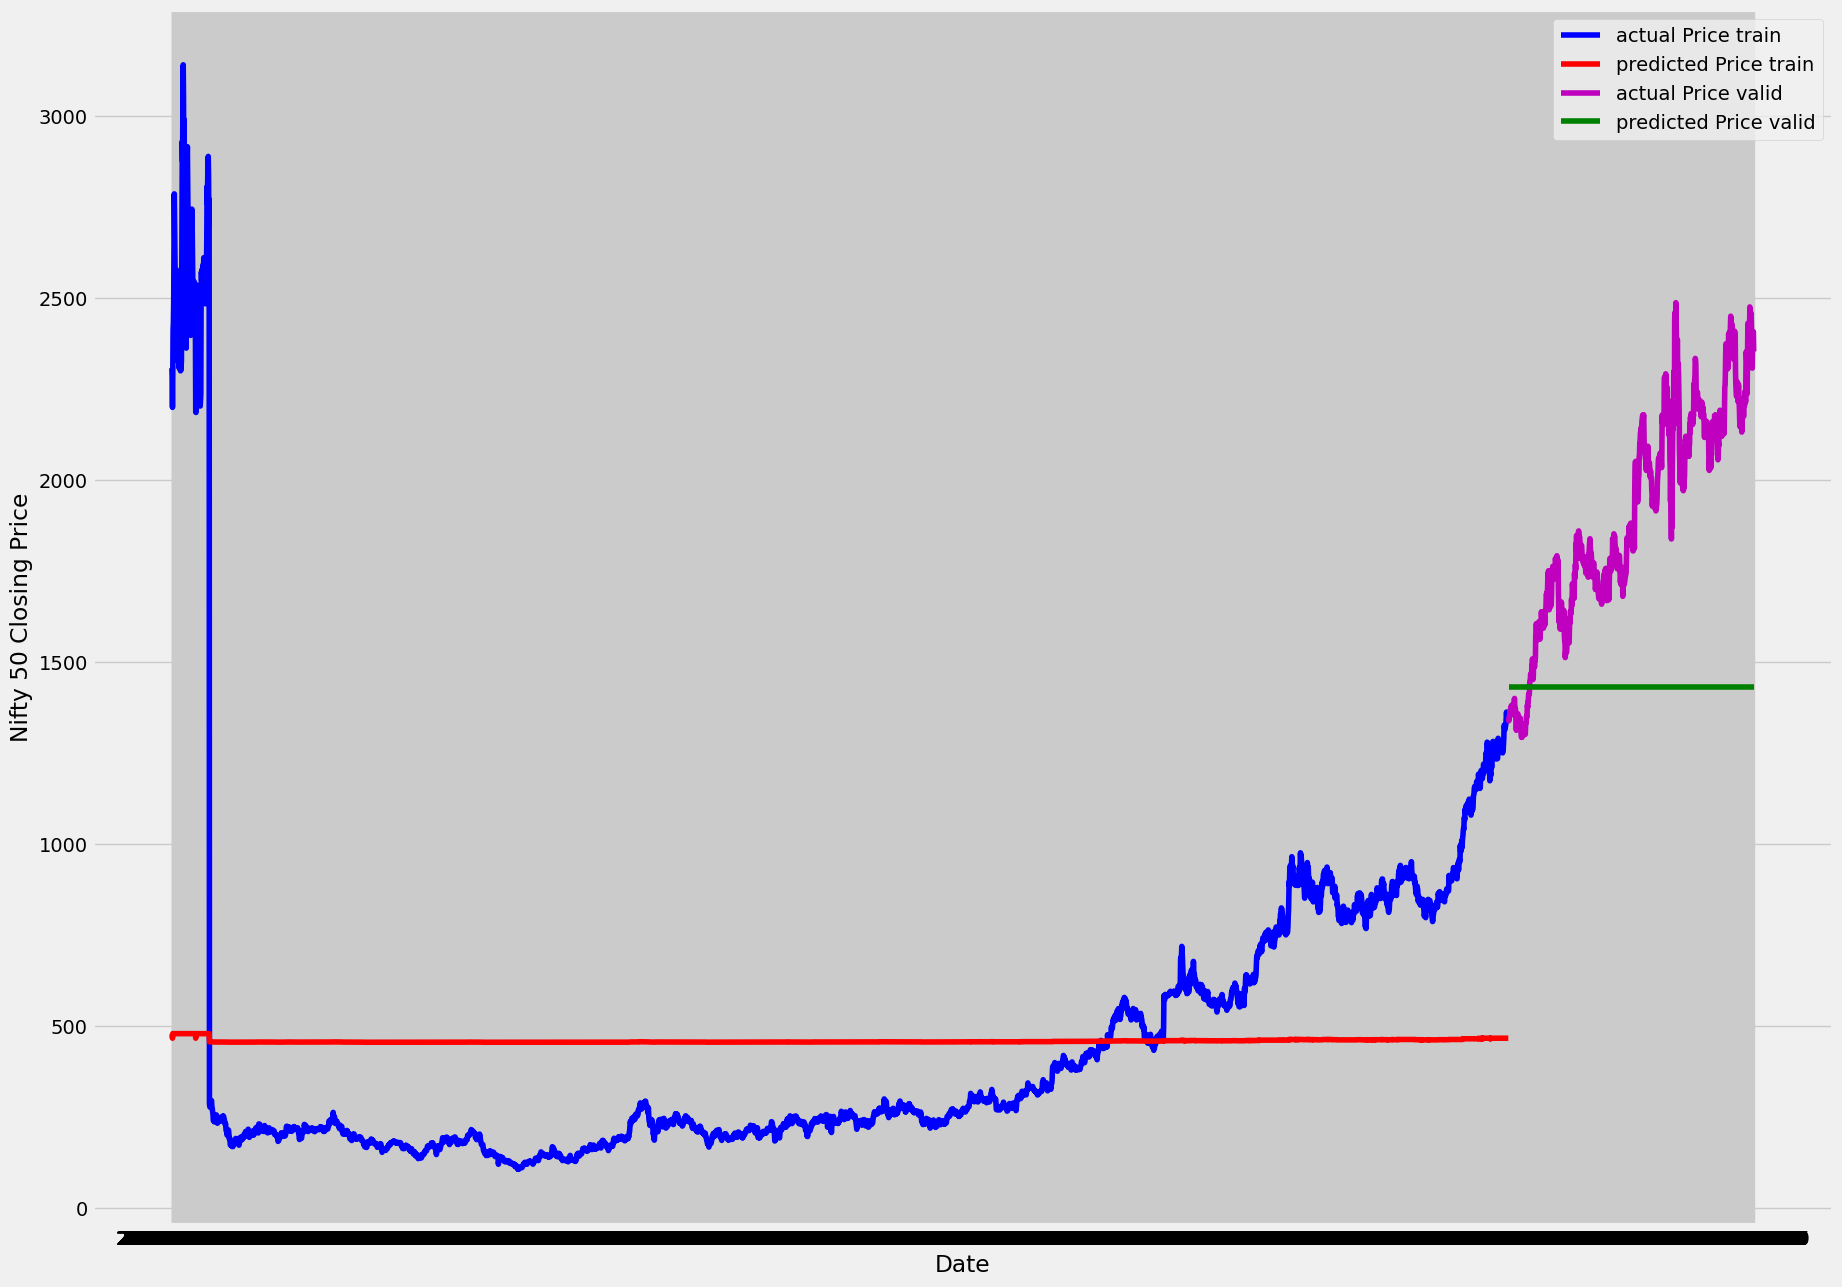

In [96]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="actual Price train", color='b')
plt.plot(X_train2.index,list(predicted_results_t), label="predicted Price train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v), label="predicted Price valid",color='g')
plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()